<a href="https://colab.research.google.com/github/Yudhy-code-stranger/AplikomWebsite22/blob/main/Open_CV_of_CITRA_DIGITAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LA ODE MUHAMMAD YUDHY PRAYITNO**

In [17]:
#Menguplaod gambar dari perangkat komputer
from google.colab import files

file = files.upload()

Saving coba.jpeg to coba.jpeg


In [37]:
ls

coba.jpeg  dark.png  profil.jpeg  sample_data/  sun.jpg


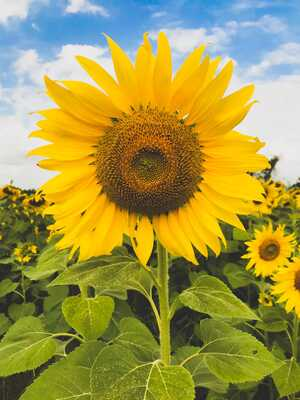

In [36]:
#Memanggil library opencv
import cv2

# memanggil fungsi google colab untuk perbaikan cv2.imshow
from google.colab.patches import cv2_imshow

# menyimpan gambar dengan fungsi imread OpenCv
img = cv2.imread("sun.jpg")

# menampilkan gambar dengan fungsi cv2_imshow
cv2_imshow(img)

In [38]:
print(img.shape)

(400, 300, 3)


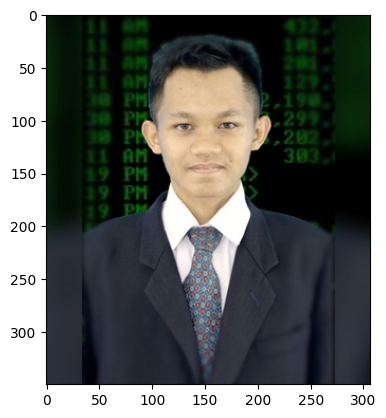

In [32]:
# memanggil fungsi plt dari matplotlib
import cv2 as cv
from matplotlib import pyplot as plt

profil = cv.cvtColor(cv.imread("profil.jpeg"), cv.COLOR_BGR2RGB)
plt.imshow(profil)
plt.show()

In [39]:
print(profil.shape)

(350, 307, 3)


Metode Ubah RGB ke Grayscale

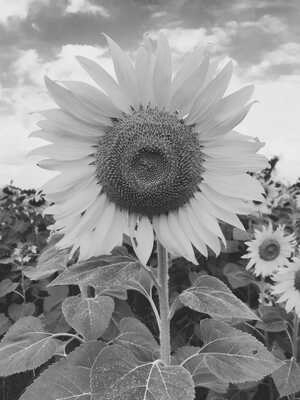

In [40]:
import numpy as np
# Citra Keabuan 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

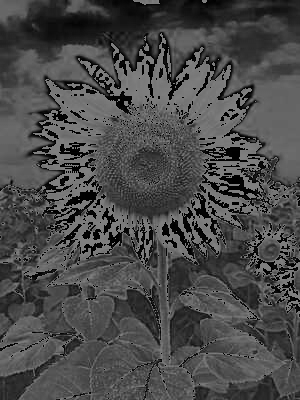

In [12]:
# Menghitung citra keabuan menggunakan metode Lightness
gray_lightness = ((img.max(axis=2) + img.min(axis=2)) /2).astype(np.uint8)

# Menampilkan hasil citra keabuan menggunakan metode Lightness
cv2_imshow(gray_lightness)

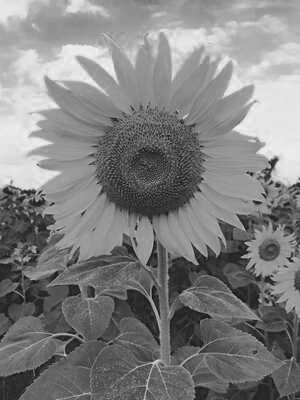

In [13]:
# Metode Average
gray_average = (img.sum(axis=2) / 3).astype(np.uint8)

# Menampilkan hasil grayscale menggunakan metode Average
cv2_imshow(gray_average)

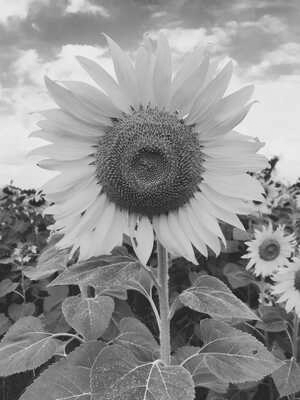

In [14]:
# Metode Luminosity
gray_luminosity = ((0.3 * img[:, :, 2]) + (0.59 * img[:, :, 1]) + (0.11 * img[:, :, 0])).astype(np.uint8)
# Menampilkan hasil grayscale menggunakan metode Luminosity
cv2_imshow(gray_luminosity)

Metode Histogram

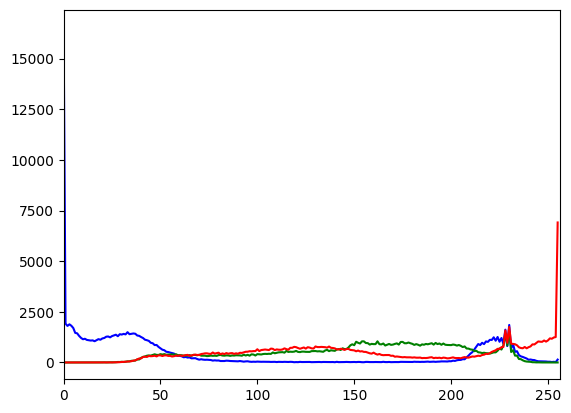

In [15]:
#Menampilkan Histogram Dari Gambar RGB
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ("b","g","r")
for i, col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr, color = col)
  plt.xlim([0,256])
plt.show()

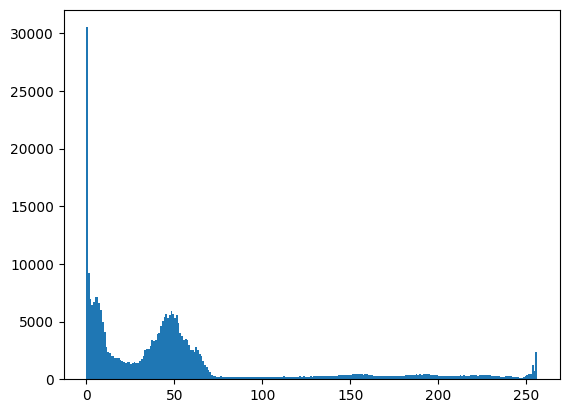

In [52]:
# ploting menggunakan fungsi histogram dari pyplot

plt.hist(profil.ravel(),256,[0,256]);

plt.show()

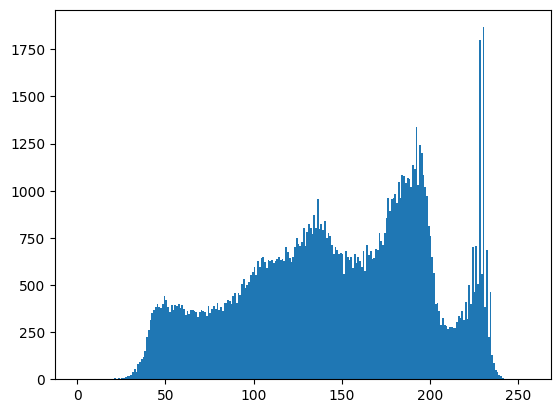

In [53]:
#Menampilkan Histogram Dari Gambar Grayscale
## Citra Keabuan
plt.hist(gray.ravel(), 256, [0, 256])

# Menampilkan histogram
plt.show()

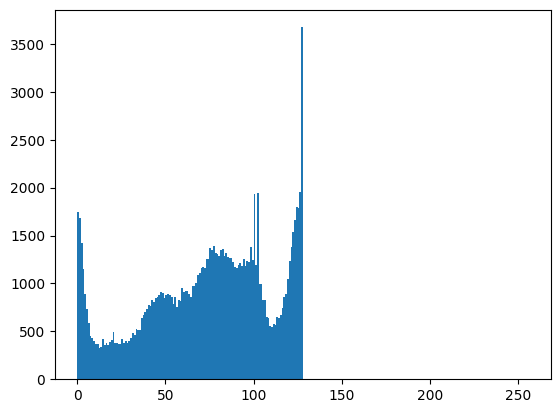

In [50]:
## Metode Lightness
plt.hist(gray_lightness.ravel(),256,[0,256]);

plt.show()

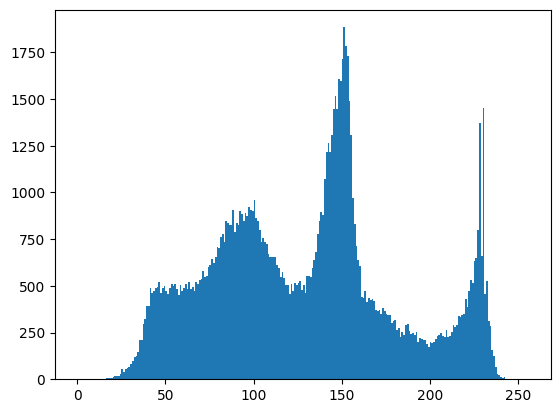

In [54]:
## Metode Average
plt.hist(gray_average.ravel(),256,[0,256]);

plt.show()

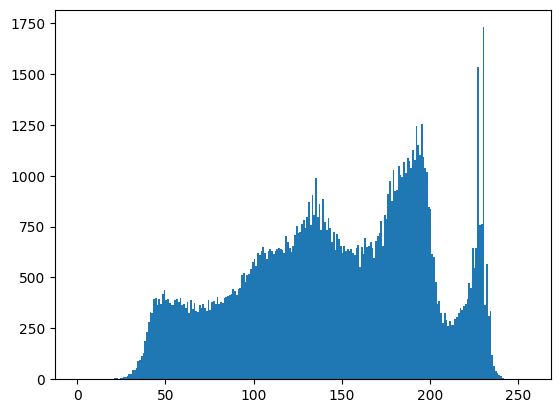

In [55]:
## Metode Luminosity
plt.hist(gray_luminosity.ravel(),256,[0,256]);

plt.show()

Konsep Kecerahan

In [27]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra grayscale
img = Image.open('coba.jpeg')
img_grey = img.convert('L')
lebar, tinggi = img_grey.size

greyA = Image.new("L", (lebar, tinggi))
greyB = Image.new("L", (lebar, tinggi))
greyC = Image.new("L", (lebar, tinggi))

beta = 100
alpha = 2.75

for x in range(lebar):
    for y in range(tinggi):
        fyx = img_grey.getpixel((x, y))
        
        # Menerapkan persamaan (1)
        gyx1 = fyx+beta
        gyx1 = np.clip(gyx1, 0, 255)
        greyA.putpixel((x, y), int(gyx1))

        # Menerapkan persamaan (2)
        gyx2 = alpha * fyx
        gyx2 = np.clip(gyx2, 0, 255)
        greyB.putpixel((x, y), int(gyx2))

        # Menerapkan persamaan (3)
        gyx3 = alpha * fyx + beta
        gyx3 = np.clip(gyx3, 0, 255)
        greyC.putpixel((x, y), int(gyx3))

larikImg = list(img_grey.getdata())
larikImgA = list(greyA.getdata())
larikImgB = list(greyB.getdata())
larikImgC = list(greyC.getdata())

jml = 255

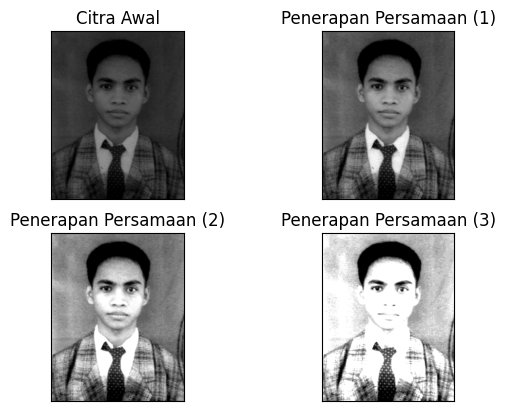

In [28]:
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(greyA, cmap='gray')
plt.title('Penerapan Persamaan (1)'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(greyB, cmap='gray')
plt.title('Penerapan Persamaan (2)'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(greyC, cmap='gray')
plt.title('Penerapan Persamaan (3)'), plt.xticks([]), plt.yticks([])
plt.show()

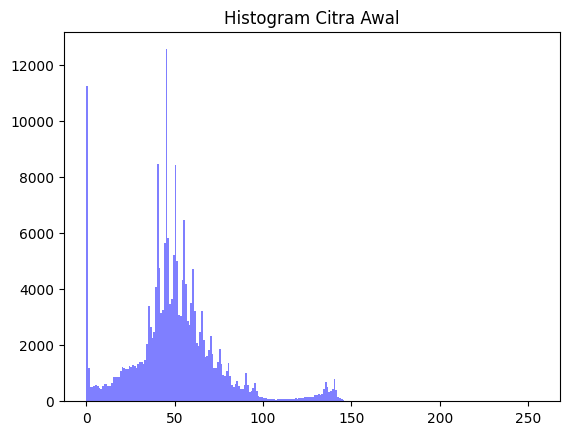

In [29]:
# Menampilkan Histogram Citra Awal
plt.hist(larikImg, jml, range=(0, 255), facecolor='blue', alpha=0.5)
plt.title('Histogram Citra Awal')
plt.show()


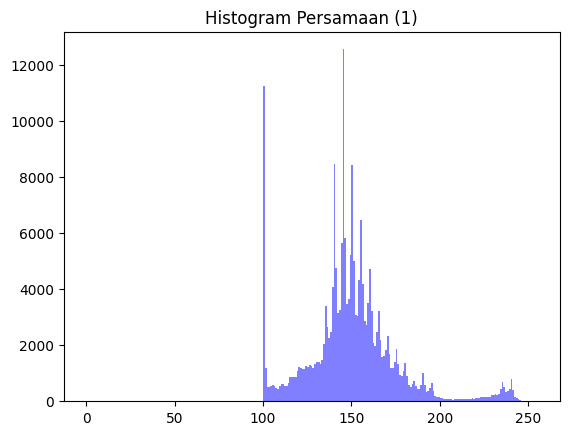

In [30]:
# Menampilkan Histogram Citra Persamaan (1)
plt.hist(larikImgA, jml, range=(0, 255), facecolor='blue', alpha=0.5)
plt.title('Histogram Persamaan (1)')
plt.show()


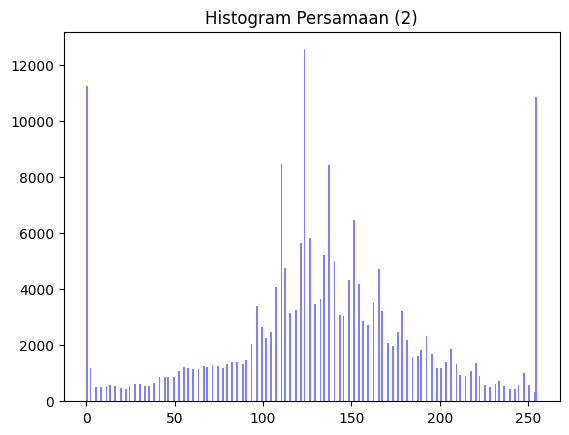

In [25]:
# Menampilkan Histogram Citra Persamaan (2)
plt.hist(larikImgB, jml, range=(0, 255), facecolor='blue', alpha=0.5)
plt.title('Histogram Persamaan (2)')
plt.show()


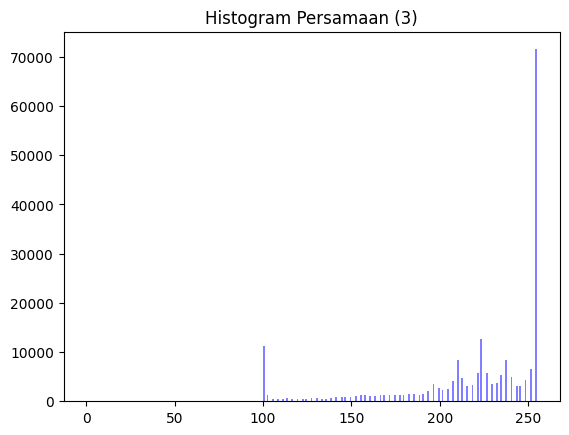

In [26]:
# Menampilkan Histogram Citra Persamaan (3)
plt.hist(larikImgC, jml, range=(0, 255), facecolor='blue', alpha=0.5)
plt.title('Histogram Persamaan (3)')
plt.show()

In [45]:
from PIL import Image, ImageEnhance
import cv2
import numpy as np
import matplotlib.pyplot as plt

beta = 100
alpha = 2.75

img = Image.open('coba.jpeg')
img_gray = img.convert('L')

## Mengubah citra keabuan menjadi array numpy
img_gray_ = np.array(img)
img_gray_arr = np.array(img_gray)



# Menerapkan persamaan (1)
brightened_img1 = img_gray_ + beta
brightened_img1 = np.clip(brightened_img1, 0, 255).astype(np.uint8)

# Menerapkan persamaan (2)
brightened_img2 = alpha * img_gray_arr
brightened_img2 = np.clip(brightened_img2, 0, 255).astype(np.uint8)

# Menerapkan persamaan (3)
brightened_img3 = alpha * img_gray_arr + beta
brightened_img3 = np.clip(brightened_img3, 0, 255).astype(np.uint8)

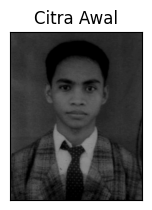

In [46]:
# Menampilkan gambar awal dan hasil pemrosesan
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])
plt.show()

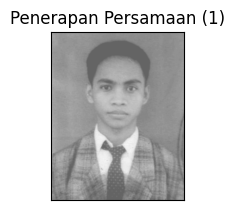

In [47]:
plt.subplot(2, 2, 2), plt.imshow(brightened_img1, cmap='gray')
plt.title('Penerapan Persamaan (1)')
plt.xticks([])
plt.yticks([])

plt.show()

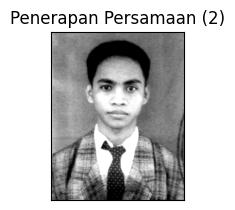

In [27]:
plt.subplot(2, 2, 3), plt.imshow(brightened_img2, cmap='gray')
plt.title('Penerapan Persamaan (2)'), plt.xticks([]), plt.yticks([])

plt.show()

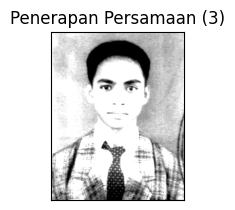

In [28]:
plt.subplot(2, 2, 4), plt.imshow(brightened_img3, cmap='gray')
plt.title('Penerapan Persamaan (3)'), plt.xticks([]), plt.yticks([])

plt.show()